In [2]:
import Gadget as G
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.mlab import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import numpy           as np
import math            as mt
import statistics      as st
import snap_blocks     as sb
import plots           as im
import plot_format     as pf
import global_fuctions as gf
import mpl_toolkits

In [3]:
#plot parameters
mpl.style.use('classic')
font = {'family': 'sans-serif', 'size': 20, 'sans-serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('legend', **{'fontsize': 15}) 
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rc('lines', linewidth=3)

In [4]:
#declaration of paths
path_main = '/home/meugenia/Documentos/discos/'
path_snap = path_main+'snaps/'
path_save = path_main +'plots/'

In [6]:
snap = 'snapshot_160'
ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)

In [7]:
r=(x_s*x_s+y_s*y_s)**0.5

In [21]:
limx    = [-10,10]
limy    = [-10,10]
limz    = [-3,3]
limrho  = [0.0002,10**(-3.85)]
liminte = [-2.15,1]
limvrms = [-3,0]
limr    = [0,200]

sgvar = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]

var   = [3,2]#1,2,4]
vlims = [limr,limz]#limy,limz,limrho]

for i in range(len(var)):
    print vlims[i]
    if i==0:
        _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
        sgvar=_sgvar
        print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
    else:
        _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                           sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                           sgvar[10][0],sgvar[11][0],sgvar[12][0]], var[i],vlims[i])
        sgvar=_sgvar
        print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        

sgx,sgy,sgz,sgr,sgrho,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = gf.subgroup_all(_sgvar)  

[0, 200]
3 0.026673837 199.9964
[-3, 3]
2 -2.9999933 2.9999955


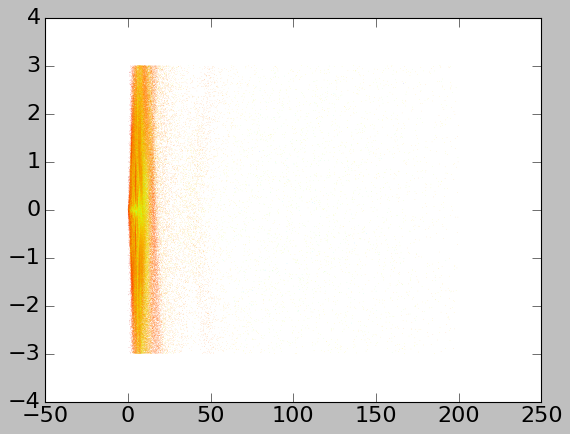

In [22]:
plt.scatter(sgr,sgz,c=np.log10(abs(sgvz)),edgecolor='none',s=0.1)
plt.show()

In [18]:
snap

'snapshot_160'